In [1]:
# 检测书法文字
# 步骤：
# 1、读取图片，灰度、二值化处理
# 2、侵蚀去噪点
# 3、膨胀连接
# 4、闭合孔洞
# 5、边缘检测
# 6、画检测框


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
plt.rcParams['figure.dpi']=200

In [3]:
# 读取
img = cv2.imread('./test_imgs/shufa.jpg')

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

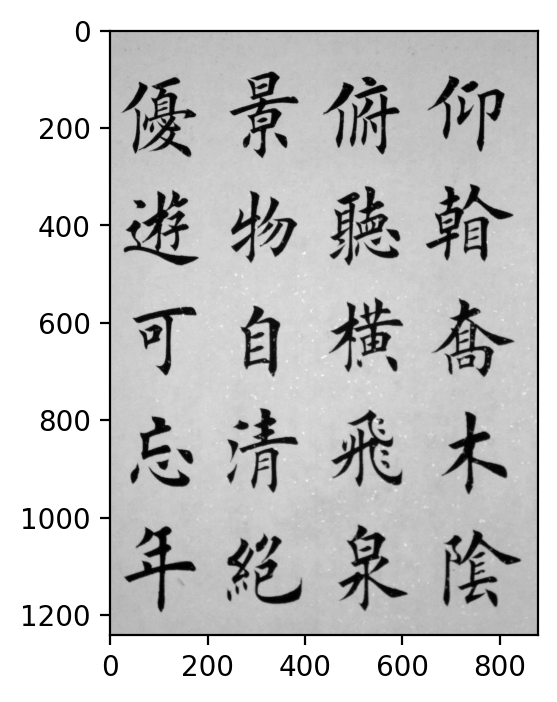

In [5]:
# 显示灰度图
plt.imshow(gray,cmap='gray')

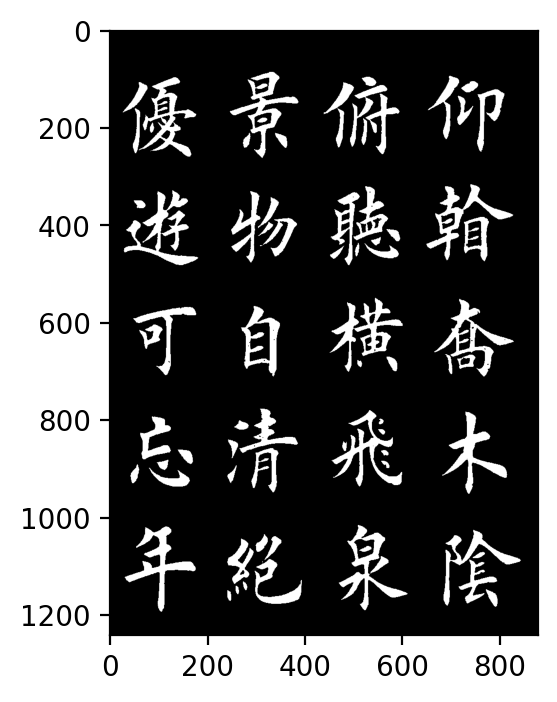

In [6]:
# 二值化
# 参数1：输入图片
# 参数2：比较的阈值
# 参数3：超出阈值被设定的值
# 参数4：模式

# 作用：将画面像素与比较阈值对比，小于它则设为0（黑色），大于它设为目标值
r,black_img = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
plt.imshow(black_img,cmap='gray')

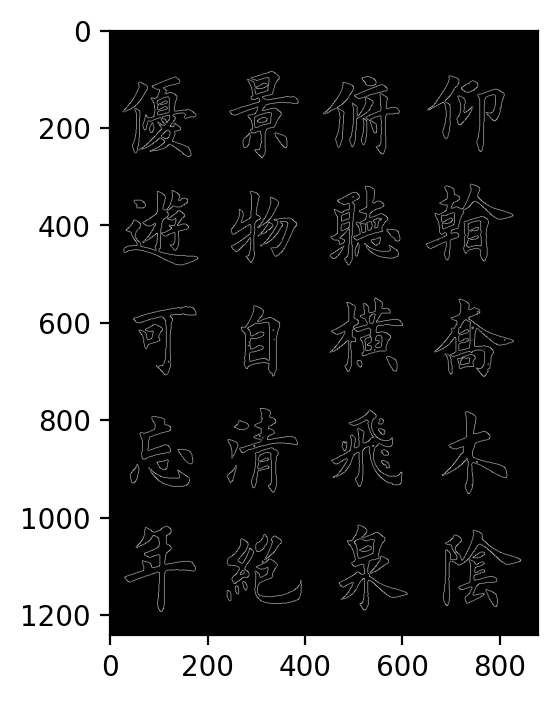

In [7]:
# 边缘检测
edges = cv2.Canny(black_img,30,200)
plt.imshow(edges,cmap='gray')

In [8]:
# 找轮廓
coutours,h = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [9]:
img_copy = img.copy()
for c in coutours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),3)

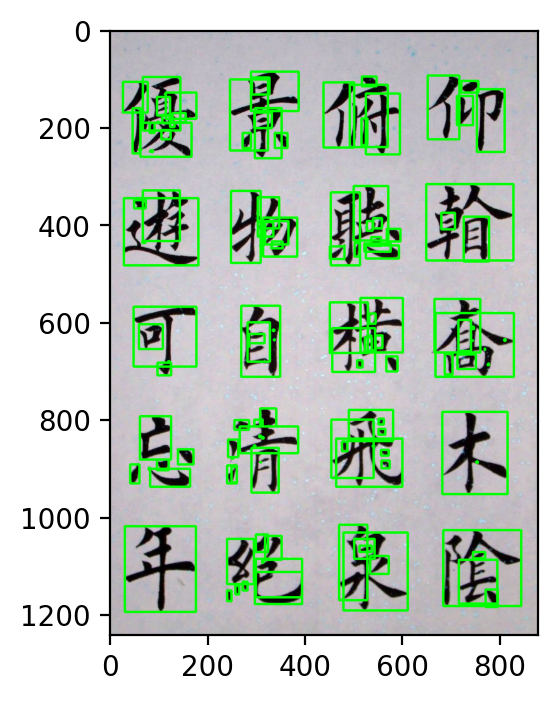

In [10]:
plt.imshow(img_copy)

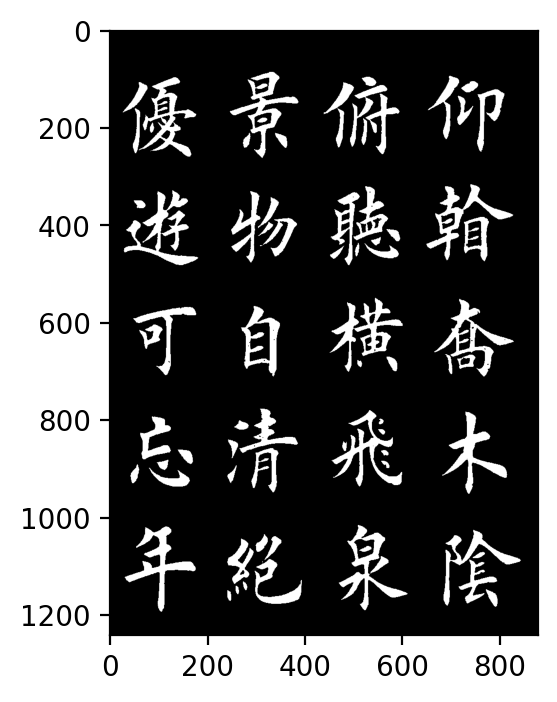

In [12]:
plt.imshow(black_img,cmap='gray')

In [11]:
# 形态学变化

In [14]:
# 先侵蚀，去除噪点
kernel = np.ones((3,3),dtype=np.int8)
erosion1=cv2.erode(black_img,kernel,iterations=1)

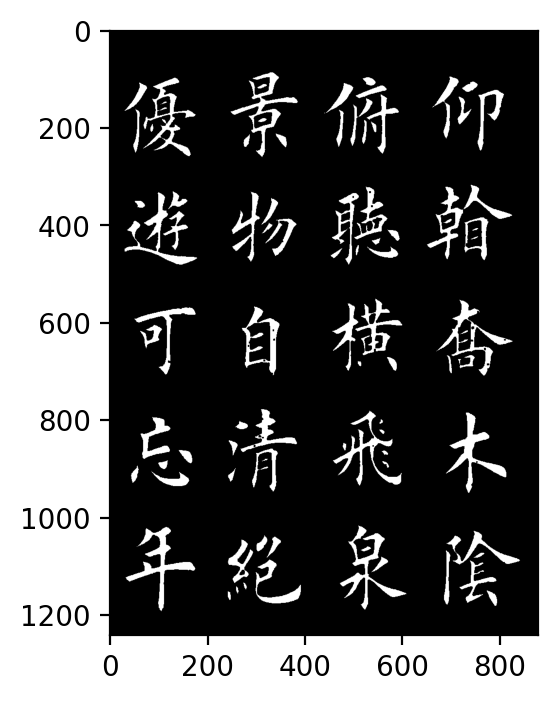

In [15]:
plt.imshow(erosion1,cmap='gray')

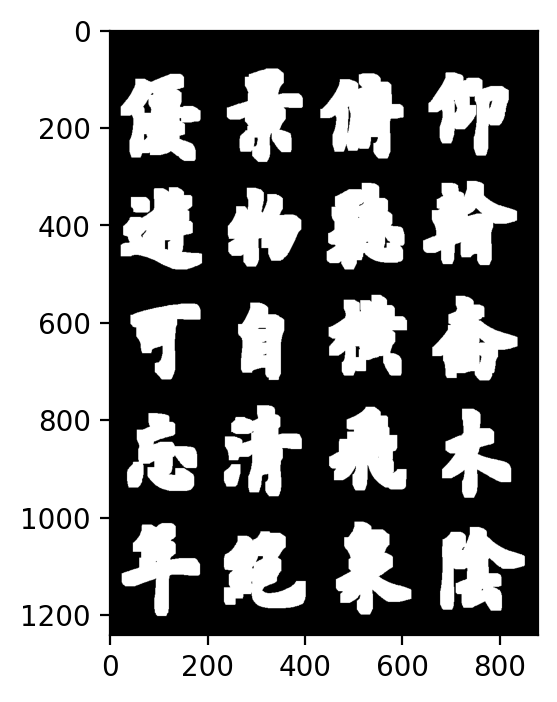

In [17]:
# 再膨胀
kernel = np.ones((10,10),dtype=np.int8)
dilation = cv2.dilate(erosion1,kernel,iterations=2)
plt.imshow(dilation,cmap='gray')

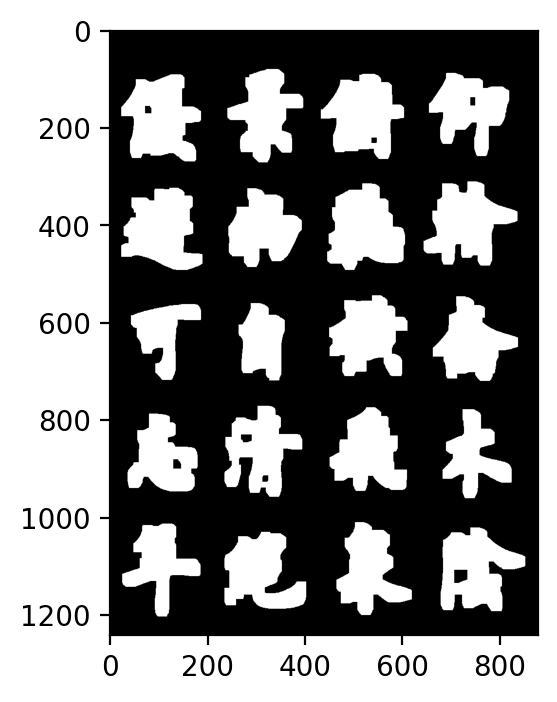

In [18]:
# 闭合
kernel = np.ones((10,10),dtype=np.int8)
closing = cv2.morphologyEx(dilation,cv2.MORPH_CLOSE,kernel)
plt.imshow(closing,cmap='gray')

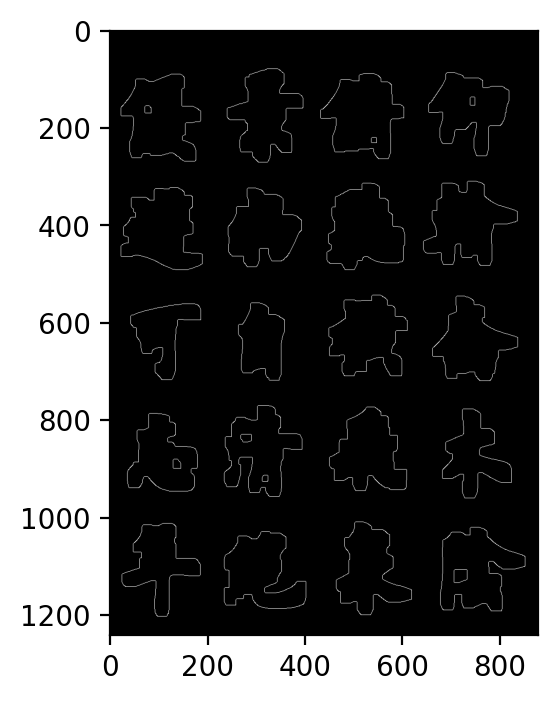

In [19]:
# 边缘检测
edges1 = cv2.Canny(closing,30,200)
plt.imshow(edges1,cmap='gray')

In [20]:
# 找轮廓
coutours1,h = cv2.findContours(edges1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

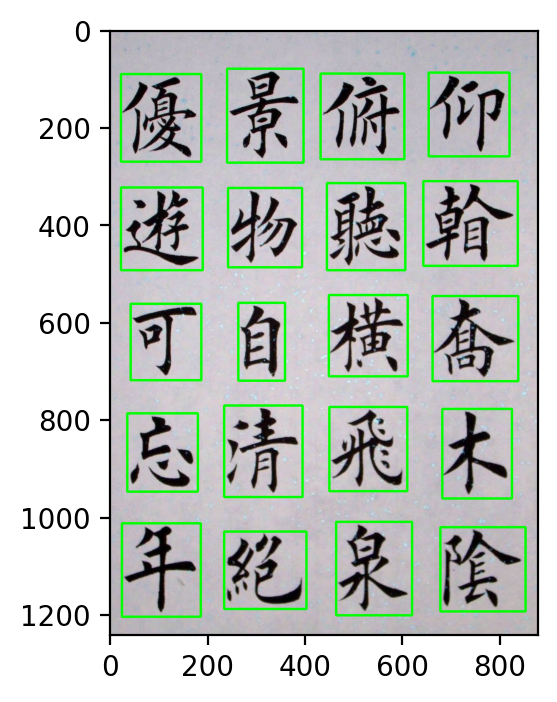

In [24]:
img_copy = img.copy()
for c in coutours1:
    x,y,w,h = cv2.boundingRect(c)

    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(img_copy)    